# M2P16 Capstone Project
--------

**Summary/Objective:** <br>
This project will involve supervised regression models to **predict the price of a laptop** based on a dataset containing various laptop features. The dataset includes information such as screen size, RAM, CPU, GPU, storage and other specifications. Each model is trained and evaluated to compare their performance in predicting laptop prices, with the goal of determining the most accurate model for this task.

**Reference link for data set:** <br>
https://www.kaggle.com/datasets/owm4096/laptop-prices


**Three supervised regression models will be used:**
1. Multiple Linear Regression with Ridge Regularization
2. Random Forest Regression
3. Support Vector Regression (SVR)

**The material applied from Module 2 will be the following:**
1. Feature Engineering and Data Preprocessing
2. Linear Regression
3. Regularization
4. Decision Trees and Random Forests (Regression)
5. Support Vector Regression (SVR)

**The project will be split into five parts:**
1. Part 1 will involve EDA, Visualization, Data Cleaning, Encoding, Data Preparation (ex: Split to X and y).  <br>
2. Part 2 will be working with Model #1: Multiple Linear Regression with Ridge Regularization. <br>
3. Part 3 will be working with Model #2: Random Forest Regression. <br>
4. Part 4 will be working with Model #3: Support Vector Regression (SVR). <br>
5. Part 5 will be determining which of the three models has the best performance and having the best performing model be our final model. <br>
   The final model will be used to make a prediction and includes some final comments/conclusion. <br>
   The final model will also be deployed and loaded to make a prediction. <br>

In [2]:
#1.1 Import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#1.2 Load data

laptop_df = pd.read_csv("../M2P16-Project_Main/laptop_prices.csv")
laptop_df

# Reference link for data set:
# https://www.kaggle.com/datasets/owm4096/laptop-prices


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


**Reference link for data set:** <br>
https://www.kaggle.com/datasets/owm4096/laptop-prices

In [5]:
# 1.3.1 EDA here

# Note: I commented out (added #) for some lines of code so it won't take space in the output. 
# If you want to see the output, remove the # before "print" in each line.

# Data exploration:

# View first 5 rows of df.
#print(laptop_df.head())

# View last 5 rows of df.
#print(laptop_df.tail())

# View descriptive statistics of the numerical columns.
#print(laptop_df.describe())


# View a summary of the dataset including data types, number of non-null entries and memory usage. 
print(laptop_df.info())

# View missing values in the dataset.
print(laptop_df.isnull().sum())

# View data types of each column.
print(laptop_df.dtypes)


# View the unique values in a column
#print(laptop_df['price'].unique())

# View the count of unique values in each column
#print(laptop_df.nunique())


# Note: There are no missing values.

# 'Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage' are numerical (float64 and int64).

# Columns considered to be removed: 
# - 'Company', 'Product', 'Touchscreen', 'IPSpanel', 'RetinaDisplay' (they could all overlap with TypeName).

# (If the above columns are to be removed), remaining columns to make numeric:
# 'TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model'

# Note: 'Price_euros' is the target variable.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

**Observations from EDA:**
- There are no missing values.
- 'Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage' are numerical (float64 and int64).  
- The other features which are objects will either be removed or will be converted to be numeric (int, float). 

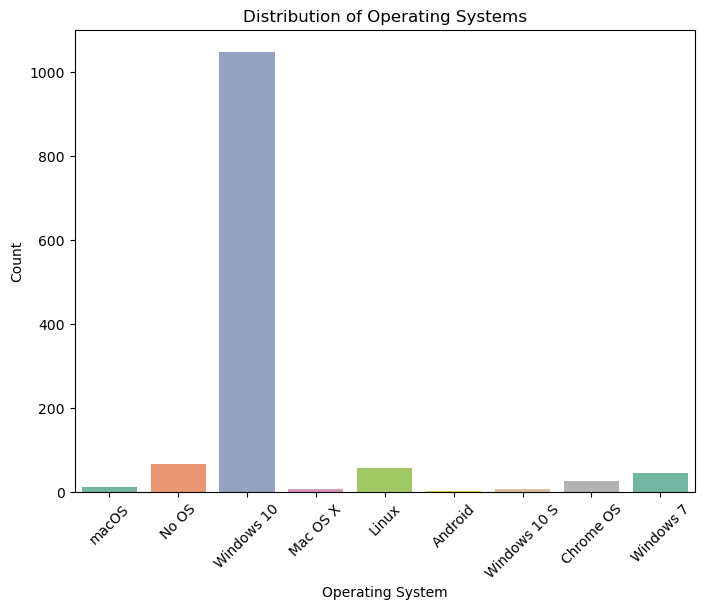

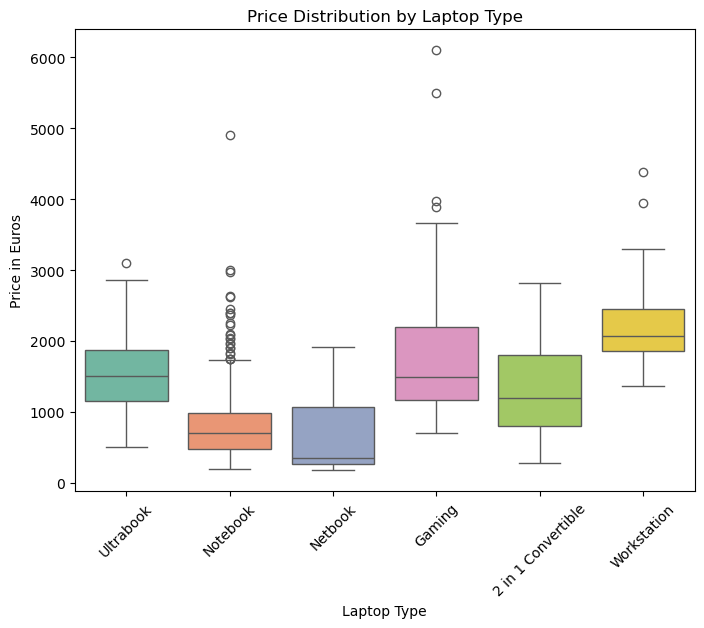

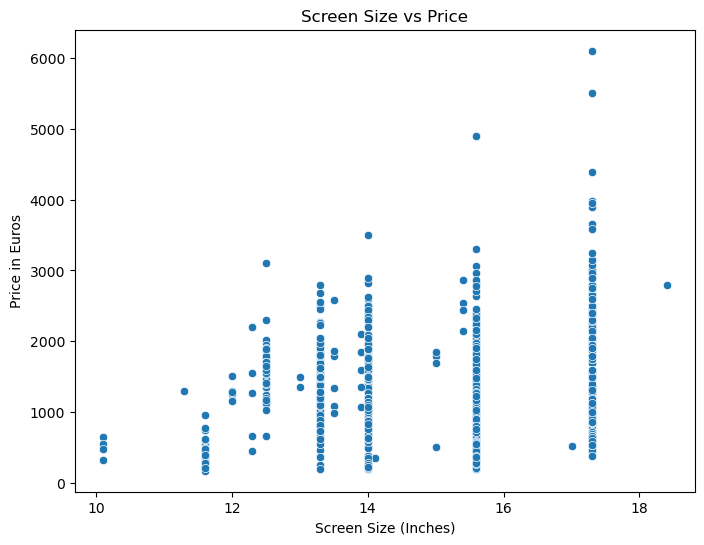

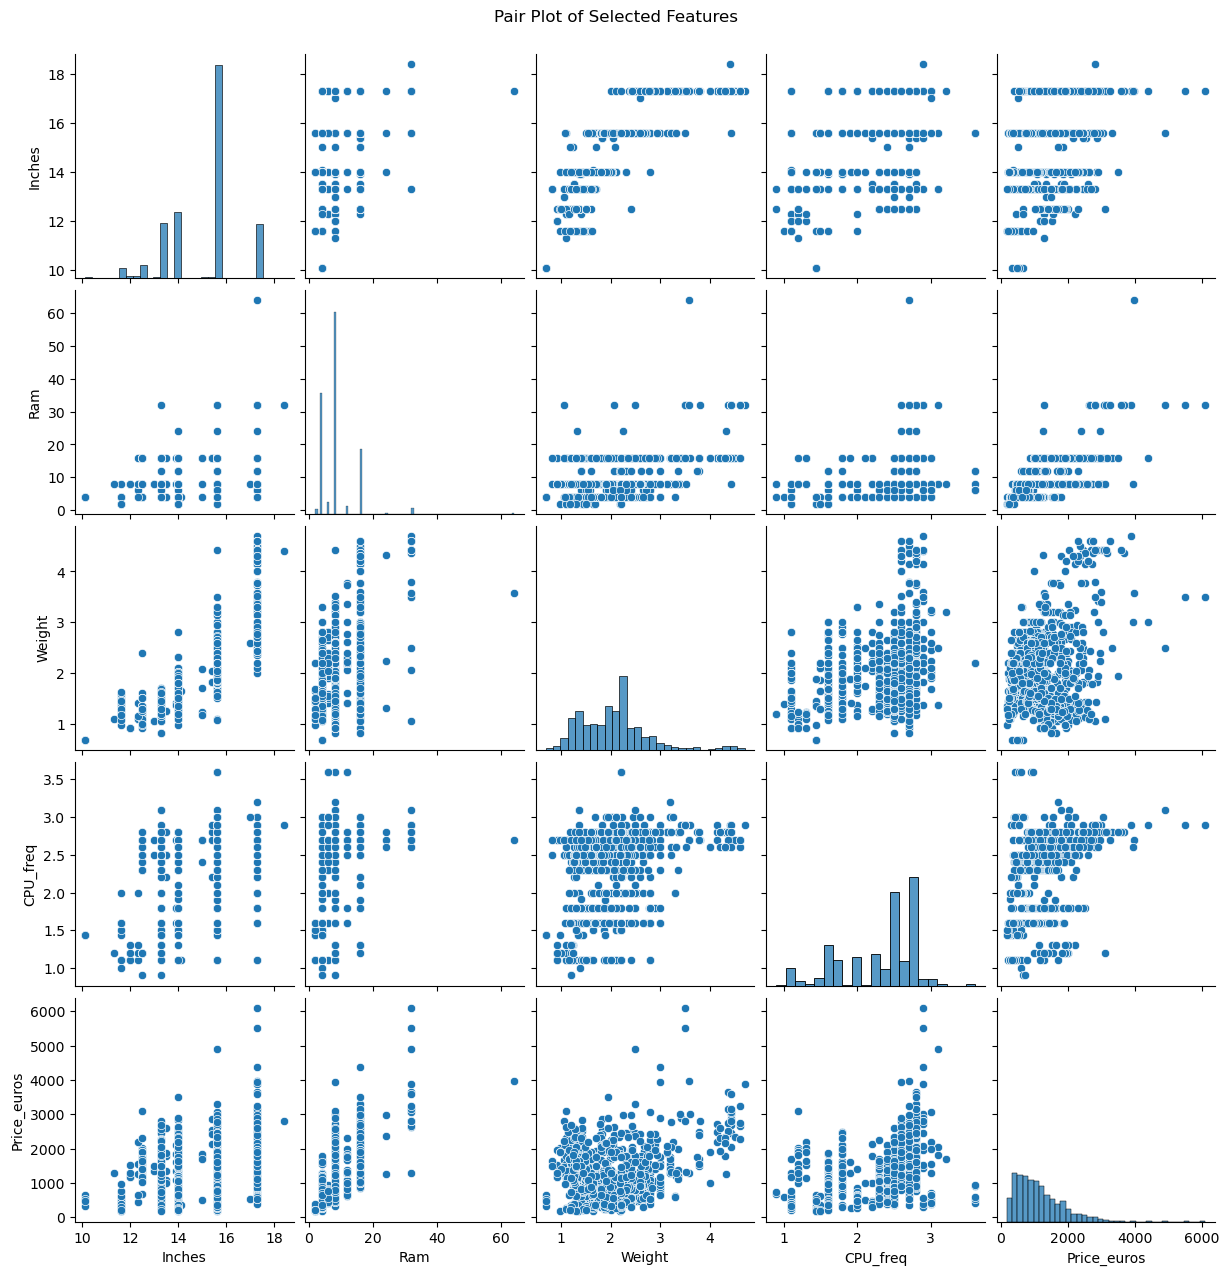

In [7]:
# 1.3.2 Visualization

#(Separation)----------------------------------Count plot for 'OS'------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'OS' column

plt.figure(figsize=(8, 6))
sns.countplot(data=laptop_df, x='OS', hue='OS', palette='Set2') 
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()


#(Separation)----------------------------------Box plot for 'Price_euros' by 'TypeName'------------------------------------

# Box plot for 'Price_euros' by 'TypeName'
plt.figure(figsize=(8, 6))
sns.boxplot(data=laptop_df, x='TypeName', y='Price_euros', hue='TypeName', palette='Set2')  
plt.title('Price Distribution by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Price in Euros')

plt.xticks(rotation=45)

plt.show()


#(Separation)----------------------------------Box plot for 'Screen Size (Inches)' vs 'Price_euros'------------------------------------

# Scatter plot for 'Inches' vs 'Price_euros'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=laptop_df, x='Inches', y='Price_euros')
plt.title('Screen Size vs Price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price in Euros')
plt.show()


#(Separation)----------------------------------Pair plot for 'Inches', 'Ram', 'Weight', 'CPU_freq', 'Price_euros'------------------------------------

# Pair plot for 'Inches', 'Ram', 'Weight', 'CPU_freq', 'Price_euros',
sns.pairplot(laptop_df[['Inches', 'Ram', 'Weight', 'CPU_freq', 'Price_euros']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


**Observations from Visualization:**
- Windows 10 has the highest count for OS (Operating System).
- For 'TypeName' (or laptop type), Worksations, Ultrabooks and Gaming laptops tend to have the highest prices.
- An increase in Screen Sizes, RAM and CPU_freq tend to have an increase in price.    

In [9]:
# 1.4 Data Cleaning

# 1.4.1 Data Cleaning: Remove features which are not useful.

# 'Company' and 'Product' will be removed as they do not provide valuable information regarding laptop 
# specifications (like CPU, RAM, screen resolution, and storage) which could affect the price. 

# 'Touchscreen', 'IPSpanel', 'RetinaDisplay' are very specific for certain laptop brands. 
# They may not provide useful insights for modeling or could be considered redundant in terms of identifying key features.

# Remove 'Company', 'Product', 'Touchscreen', 'IPSpanel', 'RetinaDisplay'
cleaned_laptop_df = laptop_df.drop(columns=['Company', 'Product', 'Touchscreen', 'IPSpanel', 'RetinaDisplay'])

# Display DataFrame with removed columns
#print(cleaned_laptop_df.head())
cleaned_laptop_df.head()

,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


**Dropping Unnecessary Features:** <br>
- 'Company' and 'Product' will be removed as they do not provide valuable information regarding laptop specifications (like CPU, RAM, screen resolution, and storage) which could affect the price.
- 'Touchscreen', 'IPSpanel', 'RetinaDisplay' are very specific for certain laptop brands. They may not provide useful insights for modeling or could be considered redundant in terms of identifying key features.

In [11]:
# 1.5 Converting objects/strings to numerical, and Encoding Categorical Columns

# View data types of each column.
#print(cleaned_laptop_df.dtypes)

# Remaining columns to make numeric:
# 'TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model'

# Note: 'Price_euros' is the target variable.

# Importing OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)

# Fit and Transform features with OneHotEncoder.
encoded_cols = encoder.fit_transform(cleaned_laptop_df[['TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']])

# Get new feature names of the newly generated features (columns) after encoding.
encoded_sel_col_cleaned_laptop_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']))

encoded_sel_col_cleaned_laptop_df

# Drop/remove original feature names, and replace them with new generated feature names after encoding with OneHotEncoder. 
cleaned_laptop_df = cleaned_laptop_df.drop(columns=['TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']).join(encoded_sel_col_cleaned_laptop_df)


#(Seperation)------------------------cleaned_laptop_df.dtypes------------------------------------------------ 

# Set display options to show all columns and rows
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)  # Show all rows (use with caution if the DataFrame is large)

print(cleaned_laptop_df.dtypes)

# Every column is numeric now (int64, float64) 

#cleaned_laptop_df.shape
# Output is (1275, 237)

Inches                        float64
Ram                             int64
Weight                        float64
Price_euros                   float64
ScreenW                         int64
                               ...   
GPU_model_Radeon RX 540       float64
GPU_model_Radeon RX 550       float64
GPU_model_Radeon RX 560       float64
GPU_model_Radeon RX 580       float64
GPU_model_UHD Graphics 620    float64
Length: 237, dtype: object


**Reasoning for encoding data for Regression models:** <br>
- Regression models require numerical data (as input) to understand patterns to provide a predictive output. <br>

**Converting features to numerical data, and Encoder used:**
- One Hot Encoding was used to convert the remaining features from objects/strings to numeric values. <br>

In [13]:
# 1.6 Correlation 

# 1.6.1 Top 20 correlations with Price_euros

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation values with respect to 'Price_euros'
price_correlation = cleaned_laptop_df.corr()['Price_euros']

# Sort the correlations by absolute value, and get the top 20
top_20_price_correlation = price_correlation.abs().sort_values(ascending=False).head(20)

# Display the top 20 correlations with 'Price_euros'
print(top_20_price_correlation)

Price_euros                   1.000000
Ram                           0.740287
ScreenW                       0.552491
TypeName_Notebook             0.551441
ScreenH                       0.548529
PrimaryStorageType_SSD        0.507040
CPU_freq                      0.428847
PrimaryStorageType_HDD        0.425922
TypeName_Gaming               0.372681
Screen_Standard               0.368662
GPU_company_Nvidia            0.346656
GPU_model_GeForce GTX 1070    0.327276
CPU_model_Core i7 7700HQ      0.323327
SecondaryStorageType_No       0.305780
SecondaryStorage              0.291207
CPU_model_Core i7 7820HK      0.286148
GPU_model_GeForce GTX 1080    0.281962
TypeName_Ultrabook            0.255038
TypeName_Workstation          0.249459
CPU_model_Core i3 6006U       0.238850
Name: Price_euros, dtype: float64


**Observations regarding the top 20 correlations with 'Price_euros'**
- Features such as 'Ram', 'ScreenW', 'ScreenH' and 'CPU_freq' are among the highest correlations with the price.

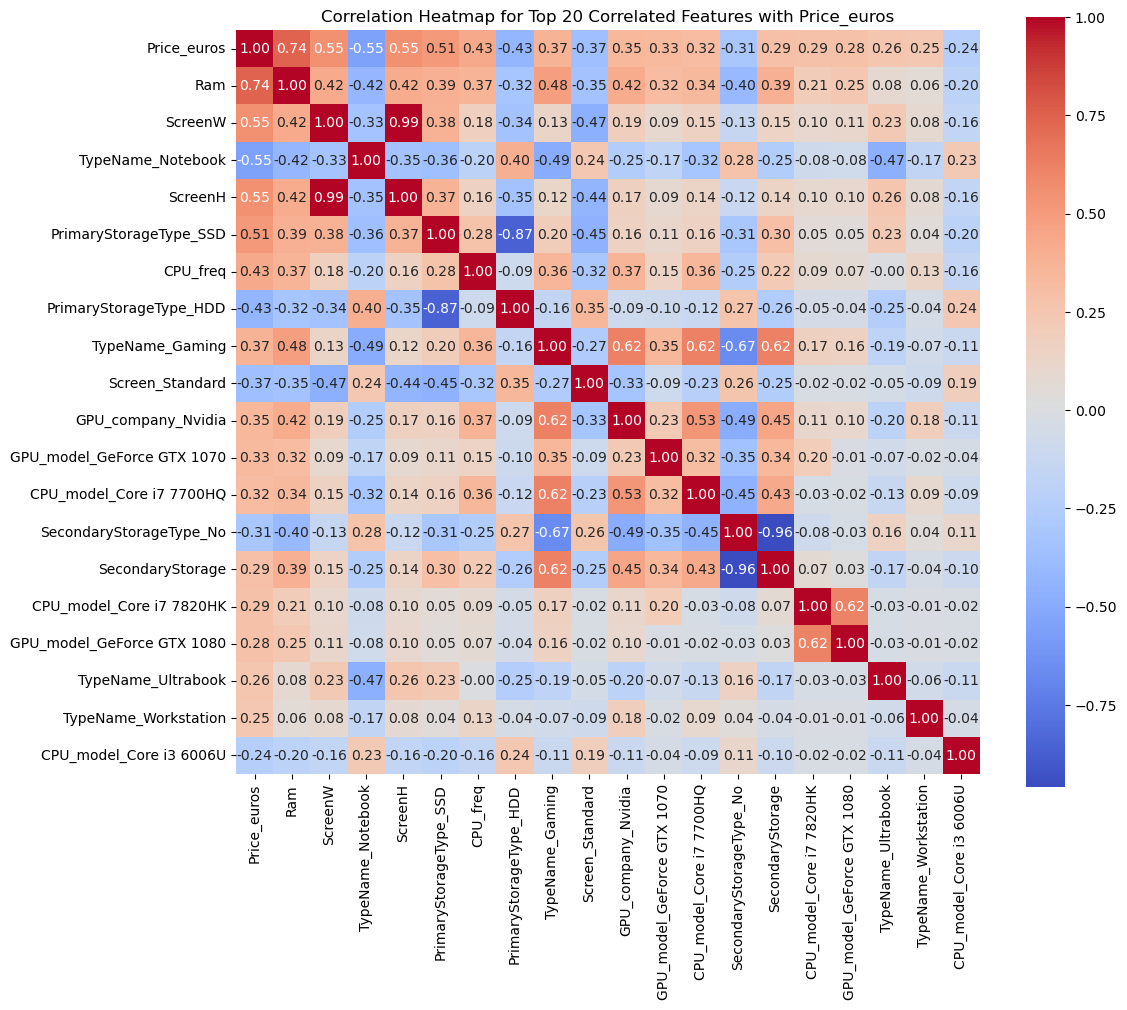

In [15]:
# 1.6.2 Correlation with heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation values with respect to 'Price_euros'
price_correlation = cleaned_laptop_df.corr()['Price_euros']

# Sort the correlations by absolute value, and get the top 20
top_20_price_correlation = price_correlation.abs().sort_values(ascending=False).head(20).index

# Create a smaller correlation matrix for the top 20 most correlated features
top_20_correlation_matrix = cleaned_laptop_df[top_20_price_correlation].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_20_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)

# Set the title
plt.title('Correlation Heatmap for Top 20 Correlated Features with Price_euros')

# Show the plot
plt.show()

In [16]:
# 1.7 Prepare Data, Split to X and y

# 'Price_euros' will be target variable, y. 

# Separate X and y
X = cleaned_laptop_df.drop('Price_euros',axis=1)
y = cleaned_laptop_df['Price_euros']


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


#(Separation)-------------------------------------Features chosen for X----------------------------------------------------
# Features chosen are the following:

# 'Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage',
# (Hot Encoded features chosen below:)
# 'TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model'

# Reasoning for chosen features:
# Features which deal with screen size and technical specifications (OS, CPU, GPU, RAM, Storage, etc.) were chosen as they could influence the price. 


#(Separation)-------------------------------------Target variable y----------------------------------------------------

# 'Price_euros' will be target variable y, as the model(s) will attempt to predict the price.

X shape: (1275, 236)
y shape: (1275,)


**Features chosen are the following:** <br>
- 'Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage' <br>
- Hot Encoded features chosen: 'TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model' <br>

**Reasoning for chosen features:** <br>
- Features which deal with screen size and technical specifications (OS, CPU, GPU, RAM, Storage, etc.) were chosen as they could influence the price. <br>

**Chosen Target variable, y:** <br>
- 'Price_euros' will be target variable y, as the model(s) will attempt to predict the price. <br>

#### Part 2: Model 1, Multiple Linear Regression with Ridge Regularization

In [19]:
# 2 Multiple Linear Regression with Ridge Regularization

# 2.1 Multiple Linear Regression: Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")

# Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

Training set shape (X_train, y_train): (892, 236), (892,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (383, 236), (383,)
Testing set shape (X_test, y_test): (192, 236), (192,)
Validation set shape (X_val, y_val): (191, 236), (191,)


Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

In [21]:
# 2.2 Multiple Linear Regression with Ridge Regularization: Scale Data

from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"Scaled training set shape: {scaled_X_train.shape}")
print(f"Scaled testing set shape: {scaled_X_test.shape}")
print(f"Scaled testing set shape: {scaled_X_val.shape}")

Scaled training set shape: (892, 236)
Scaled testing set shape: (192, 236)
Scaled testing set shape: (191, 236)


**Why Multiple Linear Regression with Ridge Regularization should have scaled data:** <br>

Multiple Linear Regression with Ridge Regularization requires scaling because the regularization term penalizes the coefficients based on their size. <br> 
If the features have different wide value ranges, the regularization will unfairly shrink larger value features more than smaller value ones. <br> 
Scaling ensures that all features contribute equally to the regularization, leading to a more balanced and effective model.

In [23]:
# 2.3 Multiple Linear Regression with Ridge Regularization. Cross Validation with GridSearchCV.

# Note: 
# Originally, I was attempting to do a Multiple Linear Regression with ElasticNet Regularization model. 
# However, after getting multiple convergence error messages (with ElasticNet), where they state that it was unable to converge, the error message 
# recommended to use 'Ridge' instead. Hence why Ridge Regularization is being used now.

# While using Ridge Regularization was overall better, I still got convergence error messages the more I added parameters in the param_grid.
# To avoid convergence error messages, the param_grid was customized to be simplistic, only including 'alpha' as its parameter.


# 2.3.1 Cross Validation with GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np


# Ridge regression model
ridge_model = Ridge(max_iter=5000)  

# Parameter grid for Ridge
param_grid = {
    'alpha': np.logspace(1, 6, 20)    
}

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# Perform GridSearchCV with 5-fold cross-validation
grid_model1 = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_model1.fit(scaled_X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(max_iter=5000),
             param_grid={'alpha': array([1.00000000e+01, 1.83298071e+01, 3.35981829e+01, 6.15848211e+01,
       1.12883789e+02, 2.06913808e+02, 3.79269019e+02, 6.95192796e+02,
       1.27427499e+03, 2.33572147e+03, 4.28133240e+03, 7.84759970e+03,
       1.43844989e+04, 2.63665090e+04, 4.83293024e+04, 8.85866790e+04,
       1.62377674e+05, 2.97635144e+05, 5.45559478e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [24]:
# 2.3 Multiple Linear Regression with Ridge Regularization.

# 2.3.2 Multiple Linear Regression with Ridge Regularization: best parameters and  fit best model

# Best hyperparameters
print("Best Parameters for Ridge:", grid_model1.best_params_)

#Seperation---------------Fit best model--------------------------

# Make Multiple Linear Regression with Ridge Regularization model based off of the grid model's best estimator.

ridge_model = grid_model1.best_estimator_

Best Parameters for Ridge: {'alpha': 61.58482110660264}


In [25]:
# 2.3.3 Multiple Linear Regression with Ridge Regularization: Evaluation

# Make predictions with y_pred
y_pred = ridge_model.predict(scaled_X_test)   # Don't forget, it's "scaled_X_test", not "X_test"!!

# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae_mlr = mean_absolute_error(y_test, y_pred)
mse_mlr = mean_squared_error(y_test, y_pred)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred)

print("Multiple Linear Regression with Ridge Regularization metrics:")
print(f"The MAE is {mae_mlr}")
print(f"The MSE is {mse_mlr}")
print(f"The RMSE is {rmse_mlr}")
print(f"The R2 (R-Squared) is {r2_mlr}")

Multiple Linear Regression with Ridge Regularization metrics:
The MAE is 232.39737006466007
The MSE is 113975.80667521752
The RMSE is 337.603031199688
The R2 (R-Squared) is 0.7581465205843767


#### Part 3: Model 2, Random Forest Regression

In [27]:
# 3. Random Forest Regression

# 3.1 Random Forest Regression: Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")


# Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

#(Separation)--------------------Random Forest Regression not requiring scaling-------------------------------
# Random Forest does not require data to be scaled because it builds decision trees that split data based on feature thresholds, 
# which are not affected by the scale of the features.

Training set shape (X_train, y_train): (892, 236), (892,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (383, 236), (383,)
Testing set shape (X_test, y_test): (192, 236), (192,)
Validation set shape (X_val, y_val): (191, 236), (191,)


**Why Random Forest Regression does not require scaling:** <br>

Random Forest Regression does not require scaling because it is based on decision trees, which split the data based on feature values rather than using distances or calculations affected by scale. <br>
Since the algorithm only cares about the order or threshold values of the features to make splits, it is not influenced by the magnitude of the feature values. <br>
Random Forest can handle features with different scales without affecting the model's performance. <br>

In [29]:
# 3.2 Random Forest Regression: Create model. Cross-Validation with GridSearchCV. 

# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor
# "rf_regressor" for Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Parameter grid (RandomForestRegressor) for GridSearchCV
# See link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5],      # Minimum number of samples required to split a node
}

# Perform GridSearchCV with 5-fold cross-validation
grid_model2 = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_model2.fit(X_train, y_train)           # No "scaled_X_train" or no scaling required


# Note: Long load time, approximately one minute.

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [30]:
# 3.3 Random Forest Regression: Best parameters and fit best model

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_model2.best_params_}")

# Make Random Forest Regression model based off of the grid model's best estimator.
# "rfr" for Random Forest Regression

rfr_model = grid_model2.best_estimator_
rfr_model

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestRegressor(max_depth=20, n_estimators=50)

In [31]:
# 3.4 Random Forest Regression: Evaluation

# "rfr" for Random Forest Regression

# Make predictions with y_pred
y_pred = rfr_model.predict(X_test)   # Don't forget, there is no "scaled_X_test", it is "X_test"!!
                                      # No scaling required for Random Forest.

# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae_rfr = mean_absolute_error(y_test, y_pred)
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred)

print("Random Forest Regression metrics:")
print(f"The MAE is {mae_rfr}")
print(f"The MSE is {mse_rfr}")
print(f"The RMSE is {rmse_rfr}")
print(f"The R2 (R-Squared) is {r2_rfr}")

Random Forest Regression metrics:
The MAE is 190.2199120921138
The MSE is 88839.31388053887
The RMSE is 298.05924558808584
The R2 (R-Squared) is 0.811485456451901


#### Part 4: Model 3, Support Vector Regression (SVR)

In [33]:
# 4. Support Vector Regression

# 4.1 Support Vector Regression: Split the data into training-testing data

from sklearn.model_selection import train_test_split

# 70% of data for training, set aside other 30% for validation and testing
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=1)

# Remaining 30% is divided equally into validation (15%) and test (15%) data
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): {X_OTHER.shape}, {y_OTHER.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
print(f"Validation set shape (X_val, y_val): {X_val.shape}, {y_val.shape}")


# Note: X_val and y_val are the holdout data. They will be used for evaluation after the final model is chosen.

Training set shape (X_train, y_train): (892, 236), (892,)
OTHER (Testing and Validation) set shape (X_OTHER, y_OTHER): (383, 236), (383,)
Testing set shape (X_test, y_test): (192, 236), (192,)
Validation set shape (X_val, y_val): (191, 236), (191,)


In [34]:
# 4.2 Support Vector Regression: Scale Data

from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"Scaled training set shape: {scaled_X_train.shape}")
print(f"Scaled testing set shape: {scaled_X_test.shape}")
print(f"Scaled testing set shape: {scaled_X_val.shape}")


Scaled training set shape: (892, 236)
Scaled testing set shape: (192, 236)
Scaled testing set shape: (191, 236)


**Why Support Vector Regression (SVR) should have scaled data:** <br>

Support Vector Regression (SVR) requires scaling because the algorithm relies on distances between data points to find the optimal hyperplane. <br> 
If the features have different value ranges, features with larger values will dominate the calculation of distances, leading to biased results. <br> 
Scaling ensures that all features contribute equally to the model, allowing SVR to perform better and make more accurate predictions. <br>

In [36]:
# 4.3 Support Vector Regression: Create model. Cross-Validation with GridSearchCV. 

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the SVR model
svr_model = SVR()

# Parameter grid for GridSearchCV (important hyperparameters for SVR)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],    # Kernel types to be used
    'C': [0.1, 1, 10],                      # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2],            # Epsilon parameter: margin of tolerance
    'degree': [2, 3],                       # Degree of the polynomial kernel function
}

# Perform GridSearchCV with 5-fold cross-validation
grid_model3 = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_model3.fit(scaled_X_train, y_train)

# Note: Long load time, approximately 30 seconds.


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error')

In [37]:
# 4.4 Support Vector Regression: Best parameters and fit best model

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_model3.best_params_}")

# Make Support Vector Regression model based off of the grid model's best estimator.
# "svr" for Support Vector Regression

svr_model = grid_model3.best_estimator_
svr_model

# Note: The grid_model.best_estimator_ will use the best parameters found by grid_model.best_params_ during the GridSearchCV process.

Best parameters: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'kernel': 'linear'}


SVR(C=10, degree=2, epsilon=0.01, kernel='linear')

In [38]:
# 4.5 Support Vector Regression: Evaluation

# Make predictions with y_pred
y_pred = svr_model.predict(scaled_X_test)   # Don't forget, it's "scaled_X_test", not "X_test"!!

# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred)

print("Support Vector Regression metrics:")
print(f"The MAE is {mae_svr}")
print(f"The MSE is {mse_svr}")
print(f"The RMSE is {rmse_svr}")
print(f"The R2 (R-Squared) is {r2_svr}")

Support Vector Regression metrics:
The MAE is 230.44800052026895
The MSE is 116404.76085897644
The RMSE is 341.1814192756933
The R2 (R-Squared) is 0.752992347625924


#### Part 5: Final Model

In [40]:
#5.1 Metrics data comparision and choosing best model.

# "mlr" for Multiple Linear Regression (with Ridge Regularization)
# "rfr" for Random Forest Regression
# "svr" for Support Vector Regression

import pandas as pd
# Metrics data for each model
metrics_data = {
    "Model": ["Multiple Linear Regression with Ridge", "Random Forest Regression", "Support Vector Regression"],
    "MAE": [mae_mlr, mae_rfr, mae_svr],
    "MSE": [mse_mlr, mse_rfr, mse_svr],
    "RMSE": [rmse_mlr, rmse_rfr, rmse_svr],
    "R²": [r2_mlr, r2_rfr, r2_svr]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
#print(metrics_df)
metrics_df 

# Random Forest Regression provides the best overall performance across all metrics, including the lowest errors (MAE, MSE, RMSE) 
# and the highest explained variance (R²). 
# Therefore, Random Forest Regression would be the best model and will be chosen as the final model.

,Model,MAE,MSE,RMSE,R²
0,Multiple Linear Regression with Ridge,232.397370,113975.806675,337.603031,0.758147
1,Random Forest Regression,190.219912,88839.313881,298.059246,0.811485
2,Support Vector Regression,230.448001,116404.760859,341.181419,0.752992


**Random Forest Regression performed the best in all key metrics:** <br>
- Random Forest had the lowest MAE, MSE, and RMSE, meaning that on average, it made the least error in predicting the target values. <br>
- It also had the highest R², indicating that it explained more of the variance in the target variable than the other models. <br>

**Possible reasons for why Random Forest Regression was the best model:** <br>
- Random Forest builds multiple decision trees and combines their results. This helps it to capture complex relationships in the data and reduce the risk of overfitting or underfitting.
- By averaging the predictions of many decision trees, the model generally becomes more robust and accurate. This is in contrast to individual models like MLR (Ridge) regression or SVR, which are more sensitive to outliers.

**Due to having the best performance, the Random Forest Regression model will be used as the final model to make a prediction.**

In [42]:
#5.2.a) Final model: Evaluation and metrics with holdout data

# Logistic Regression chosen as the final model.
final_model = rfr_model

# Using holdout data
y_val_pred = final_model.predict(X_val)            # No "scaled_X_val" or no scaling required for Random Forest

# Evaluate model performance with holdout data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae_holdout = mean_absolute_error(y_val, y_val_pred)
mse_holdout = mean_squared_error(y_val, y_val_pred)
rmse_holdout = np.sqrt(mse_holdout)
r2_holdout = r2_score(y_val, y_val_pred)

print("Random Forest Regression Holdout metrics:")
print(f"The MAE is {mae_holdout}")
print(f"The MSE is {mse_holdout}")
print(f"The RMSE is {rmse_holdout}")
print(f"The R2 (R-Squared) is {r2_holdout}")

Random Forest Regression Holdout metrics:
The MAE is 193.9144173950672
The MSE is 83011.96665308996
The RMSE is 288.1179734988603
The R2 (R-Squared) is 0.8158725190370497


In [43]:
#5.1.b) Final model: Comparing metrics for Random Forest Regression: test data against holdout data

import pandas as pd
# Metrics data for each model
metrics_data2 = {
    "Model": ["Random Forest Regression (Test Data)", "Random Forest Regression (Holdout Data)"],
    "MAE": [mae_rfr, mae_holdout],
    "MSE": [mse_rfr, mse_holdout],
    "RMSE": [rmse_rfr, rmse_holdout],
    "R²": [r2_rfr, r2_holdout]
}

# Create DataFrame
metrics_df2 = pd.DataFrame(metrics_data2)

# Display the table
#print(metrics_df2)
metrics_df2 

# Results of Cross-validation (with GridsearchCV):
# With Cross-validation (with GridsearchCV), the metric results of the testing data for Random Forest Regression is similar 
# to the metric results of the holdout data for Random Forest Regression.

,Model,MAE,MSE,RMSE,R²
0,Random Forest Regression (Test Data),190.219912,88839.313881,298.059246,0.811485
1,Random Forest Regression (Holdout Data),193.914417,83011.966653,288.117973,0.815873


**Results of Cross-validation (with GridsearchCV):** <br>
- With Cross-validation (with GridsearchCV), the metric results of the testing data for Random Forest Regression is similar to the metric results of the holdout data for Random Forest Regression.

In [45]:
#5.2 Final model: Fit Final Model

# Fitting X and y with 100% of the data.
final_model.fit(X, y)


RandomForestRegressor(max_depth=20, n_estimators=50)

In [46]:
#5.3 Final model: Prediction

#import pandas as pd

# Note: For test prediction data, I will be using a modified version of X_train.iloc[0:1], changing some values for a few features.
# The features which will have values changed are: 'Ram', 'ScreenW', 'ScreenH' and 'CPU_freq' (these features were among the top 20 correlated values).

#X_train.iloc[0:1]

# Create a new DataFrame from the first row of X_train
new_data_df = X_train.iloc[0:1].copy()

# Modify the values for the specified columns
new_data_df['Ram'] = 16
new_data_df['ScreenW'] = 2400
new_data_df['ScreenH'] = 1600
new_data_df['CPU_freq'] = 3

# Display the updated DataFrame
#print(new_df)
new_data_df

# Note: Random Forest does not require scaled data, "new_data_df" will not be scaled. 

prediction = final_model.predict(new_data_df)

print("Predicted price (in euros) for laptop:", prediction)

Predicted price (in euros) for laptop: [2139.75345]


**Result of Prediction:**

From new_data_df (data frame) as input, the Random Forest Regression Model was able to provide a prediction for the price (in euros).

In [48]:
# 5.4 Final model: Model Deployment 

# 5.4.1 Final model: Save the trained model using joblib 

# From M2P02-Linear_Regression-main, Lecture 2, 2.7 Model Deployment

from joblib import dump, load

# Eport model

dump(final_model, 'M2P16_rfr_model.joblib') 

['M2P16_rfr_model.joblib']

In [49]:
# 5.4.2 Final model: Load model

loaded_model = load('M2P16_rfr_model.joblib')

In [50]:
# 5.4.3 Final model: Use Loaded model to make prediction

# Using "new_data_df" (not scaled) from 5.3 

new_data_df

loaded_model.predict(new_data_df)

# Loaded model 'M2P16_rfr_model.joblib' was able to provide prediction as per 5.3. 

array([2139.75345])

## Conclusion 
In conclusion, three models were tested: Multiple Linear Regression with Ridge Regularization, Random Forest Regression and Support Vector Regression (SVR). <br>
**Of the three models, the Random Forest Regression model had the best performance as it has the best metrics with the lowest MAE, MSE and RMSE, and the highest R² score. The Random Forest Regression model was chosen as the final model.** <br>

- For chosen features (applied to final model, Random Forest Regression): features which deal with screen size and technical specifications (OS, CPU, GPU, RAM, Storage, etc.) were chosen as they could influence the price. <br>
- Cross-validation (with GridSearchCV) was used as a validation scheme. Cross-validation was used to evaluate the holdout data for the final model, and has similar results/metrics with the test data.<br>
- All three regression models required the data to be converted into numerical format hence the use of encoding. OneHotEncoder was used was used on all features (which were originally objects/strings) to convert their values to be numerical. <br>   
- With what was stated above, the final model (Random Forest Regression) had the encoding feature OneHotEncoder to convert the feature values to be numerical. This encoder was applied as part of feature engineering for the final model. <br>  
- Continuing with feature engineering, scaling was not applied on the data for the final model (Random Forest Regression), as it was not necessary for the Random Forest model. <br>
- As per prediction experimentation, with "new_data_df" (data frame)" as input, the Random Forest Regression Model was able to provide a prediction of the laptop price (in euros). <br>
- The final model was deployed as a joblib file (as 'M2P16_rfr_model.joblib'). After loading the final model, the final model ('M2P16_rfr_model.joblib') was able to make a prediction. <br>

### End